### Imports

In [ ]:
import torch
from torch import nn
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Iris data

#### Load the iris dataset

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

#### Split the dataset into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Define the transformer model

In [ ]:
# Define the transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_layers):
        super().__init__()

        self.pos_encoder = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )

        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )

        self.decoder = nn.Linear(d_model, output_dim)

    def forward(self, x):
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.decoder(x)
        return x

#### Define the hyperparameters

In [ ]:
input_dim = X.shape[1]
output_dim = 5
d_model = 128
nhead = 4
num_layers = 4
lr = 0.0001
epochs = 1000
batch_size = 16

#### Define the optimizer and loss function

In [ ]:
# Define the model
model = TransformerModel(input_dim, output_dim, d_model, nhead, num_layers)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

#### Train the model

In [ ]:
# Train the model
for epoch in range(epochs):
    # Shuffle the training data
    perm = torch.randperm(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    # Split the training data into batches
    for i in range(0, len(X_train), batch_size):
        # Get the current batch
        X_batch = torch.tensor(X_train[i:i+batch_size]).float()
        y_batch = torch.tensor(y_train[i:i+batch_size])

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(X_batch)

        # Calculate the loss
        loss = criterion(output, y_batch)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 1.181822419166565
Epoch 100, Loss: 0.06787852942943573
Epoch 200, Loss: 0.17914697527885437
Epoch 300, Loss: 0.06281807273626328
Epoch 400, Loss: 0.05809047818183899
Epoch 500, Loss: 0.12390032410621643
Epoch 600, Loss: 0.02472449652850628
Epoch 700, Loss: 0.0038020098581910133
Epoch 800, Loss: 0.027068650349974632
Epoch 900, Loss: 0.005737978965044022


#### Generate new data

In [ ]:
# Generate new data
generated_data = []
for i in range(120):
    # Generate a random input vector
    x = torch.rand(input_dim).unsqueeze(0)

    # Forward pass through the model to generate the output vector
    output = model(x)

    # Convert the output vector to a numpy array
    generated_data.append(output.detach().numpy())

# Convert the generated data to a numpy array
generated_data = np.array(generated_data)

generated_data = model(torch.tensor(X_train).float())

#### Logistic regression model

In [ ]:
import statistics as st
accuracy_raw = []
for i in range(30):   
    # Train a logistic regression model on the raw features
    lr_raw = LogisticRegression(max_iter = 10000)
    lr_raw.fit(X_train, y_train)

    # Test the logistic regression model on the test set
    y_pred_raw = lr_raw.predict(X_test)
    accuracy_raw.append(accuracy_score(y_test, y_pred_raw))
acc_raw = st.mean(accuracy_raw)
# Generate new data for the testing set
X_test_generated = model(torch.tensor(X_test).float())

# Train a logistic regression model on the generated features from the training set
accuracy_generated = []
for i in range(30):
    lr_generated = LogisticRegression(max_iter = 10000)
    lr_generated.fit(generated_data.detach().numpy(), y_train)

    # Evaluate the logistic regression model on the generated features from the testing set
    y_pred_generated = lr_generated.predict(X_test_generated.detach().numpy())
    accuracy_generated.append(accuracy_score(y_test, y_pred_generated))

acc_generated = st.mean(accuracy_generated)

X_train_raw_gen = np.concatenate((X_train, generated_data.detach().numpy()), axis=1)
X_test_raw_gen = np.concatenate((X_test, X_test_generated.detach().numpy()), axis=1)
# Train a logistic regression model on the generated features from the training set
accuracy_raw_gen = []
for i in range(30):
    lr_generated = LogisticRegression(max_iter = 10000)
    lr_generated.fit(X_train_raw_gen, y_train)

    # Evaluate the logistic regression model on the generated features from the testing set
    y_pred_generated = lr_generated.predict(X_test_raw_gen)
    accuracy_raw_gen.append(accuracy_score(y_test, y_pred_generated))

acc_raw_gen = st.mean(accuracy_raw_gen)

#### Accuracies

In [ ]:
# Print the accuracy scores
print(f"Accuracy with raw features: {acc_raw}")
print(f"Accuracy with generated features: {acc_generated}")
print(f"Accuracy with raw and generated features: {acc_raw_gen}")

Accuracy with raw features: 0.9666666666666667
Accuracy with generated features: 1.0
Accuracy with raw and generated features: 1.0


### Wine data

#### Load the wine dataset

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target

#### Split the dataset into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Define the transformer model

In [ ]:
# Define the transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_layers):
        super().__init__()

        self.pos_encoder = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )

        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead),
            num_layers=num_layers
        )

        self.decoder = nn.Linear(d_model, output_dim)

    def forward(self, x):
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.decoder(x)
        return x

#### Define the hyperparameters

In [ ]:
input_dim = X.shape[1]
output_dim = 5
d_model = 128
nhead = 4
num_layers = 4
lr = 0.0001
epochs = 1000
batch_size = 16

#### Define the optimizer and loss function

In [ ]:
# Define the model
model = TransformerModel(input_dim, output_dim, d_model, nhead, num_layers)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

#### Train the model

In [ ]:
# Train the model
for epoch in range(epochs):
    # Shuffle the training data
    perm = torch.randperm(len(X_train))
    X_train = X_train[perm]
    y_train = y_train[perm]

    # Split the training data into batches
    for i in range(0, len(X_train), batch_size):
        # Get the current batch
        X_batch = torch.tensor(X_train[i:i+batch_size]).float()
        y_batch = torch.tensor(y_train[i:i+batch_size])

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(X_batch)

        # Calculate the loss
        loss = criterion(output, y_batch)


        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 1.111077904701233
Epoch 100, Loss: 0.6046842932701111
Epoch 200, Loss: 0.5480426549911499
Epoch 300, Loss: 0.5736216902732849
Epoch 400, Loss: 0.3647303581237793
Epoch 500, Loss: 0.018755024299025536
Epoch 600, Loss: 0.2550407350063324
Epoch 700, Loss: 0.11244769394397736
Epoch 800, Loss: 0.05715213343501091
Epoch 900, Loss: 0.01958932913839817


#### Generate new data

In [ ]:
# Generate new data
generated_data = []
for i in range(120):
    # Generate a random input vector
    x = torch.rand(input_dim).unsqueeze(0)

    # Forward pass through the model to generate the output vector
    output = model(x)

    # Convert the output vector to a numpy array
    generated_data.append(output.detach().numpy())

# Convert the generated data to a numpy array
generated_data = np.array(generated_data)

generated_data = model(torch.tensor(X_train).float())

#### Logistic regression model

In [ ]:
import statistics as st
accuracy_raw = []
for i in range(30):   
    # Train a logistic regression model on the raw features
    lr_raw = LogisticRegression(max_iter = 10000)
    lr_raw.fit(X_train, y_train)

    # Test the logistic regression model on the test set
    y_pred_raw = lr_raw.predict(X_test)
    accuracy_raw.append(accuracy_score(y_test, y_pred_raw))
acc_raw = st.mean(accuracy_raw)
# Generate new data for the testing set
X_test_generated = model(torch.tensor(X_test).float())

# Train a logistic regression model on the generated features from the training set
accuracy_generated = []
for i in range(30):
    lr_generated = LogisticRegression(max_iter = 10000)
    lr_generated.fit(generated_data.detach().numpy(), y_train)

    # Evaluate the logistic regression model on the generated features from the testing set
    y_pred_generated = lr_generated.predict(X_test_generated.detach().numpy())
    accuracy_generated.append(accuracy_score(y_test, y_pred_generated))

acc_generated = st.mean(accuracy_generated)

X_train_raw_gen = np.concatenate((X_train, generated_data.detach().numpy()), axis=1)
X_test_raw_gen = np.concatenate((X_test, X_test_generated.detach().numpy()), axis=1)
# Train a logistic regression model on the generated features from the training set
accuracy_raw_gen = []
for i in range(30):
    lr_generated = LogisticRegression(max_iter = 10000)
    lr_generated.fit(X_train_raw_gen, y_train)

    # Evaluate the logistic regression model on the generated features from the testing set
    y_pred_generated = lr_generated.predict(X_test_raw_gen)
    accuracy_raw_gen.append(accuracy_score(y_test, y_pred_generated))

acc_raw_gen = st.mean(accuracy_raw_gen)

#### Accuracies

In [ ]:
# Print the accuracy scores
print(f"Accuracy with raw features: {acc_raw}")
print(f"Accuracy with generated features: {acc_generated}")
print(f"Accuracy with raw and generated features: {acc_raw_gen}")

Accuracy with raw features: 0.9722222222222222
Accuracy with generated features: 0.8333333333333334
Accuracy with raw and generated features: 0.9444444444444444


### Analysis

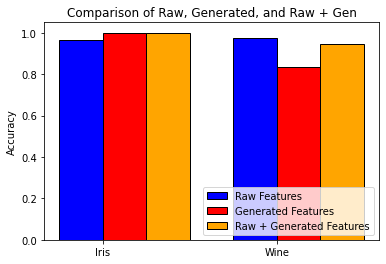

In [ ]:
import matplotlib.pyplot as plt

Dataset = ['Iris', 'Wine']
raw_features = [0.9666666666666667, 0.9722222222222222]
generated_features = [1.0, 0.8333333333333334]
raw_generated_features = [1.0, 0.9444444444444444]

# Set the width of the bars
barWidth = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(Dataset))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

# Create the bar chart
plt.bar(r1, raw_features, color='blue', width=barWidth, edgecolor='black', label='Raw Features')
plt.bar(r2, generated_features, color='red', width=barWidth, edgecolor='black', label='Generated Features')
plt.bar(r3, raw_generated_features, color='orange', width=barWidth, edgecolor='black', label='Raw + Generated Features')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth/2 for r in range(len(Dataset))], Dataset)

# Set the y-axis label
plt.ylabel('Accuracy')

# Add a title to the chart
plt.title('Comparison of Raw, Generated, and Raw + Gen')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
